<a href="https://colab.research.google.com/github/shnehapaudyal/datawarehousing/blob/main/DWCW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching the dataset from drive.

In [ ]:
!pip install kneed
!pip install squarify

In [ ]:
import pandas as pd
import sqlite3
from google.colab import drive
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import squarify
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Set up and Read the data
drive.mount('/content/drive')
data_frame=pd.read_csv('/content/drive/MyDrive/DW/Basket_dataset.csv')
drive.flush_and_unmount()
data_frame

Mounted at /content/drive


,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


In [ ]:
data_frame

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df = pd.DataFrame(data_frame)
# Renaming the columns
df = df.rename({
    "Member_number": "member_id",
    "itemDescription": "item_name",
    "Date": "date"}, axis='columns')
df

,member_id,date,item_name
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


Distribution Analysis

In [ ]:
# Member_number analysis (descriptive statistics)
print("Member Number Analysis:")
print(df['member_id'].describe())  # Count, unique values, etc.
# Item Description analysis (frequency & distribution)
print("\nItem Description Analysis:")
print(df['item_name'].value_counts())  # Frequency table

Member Number Analysis:
count    38765.000000
mean      3003.641868
std       1153.611031
min       1000.000000
25%       2002.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: member_id, dtype: float64

Item Description Analysis:
item_name
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64


Transformation of variables

In [ ]:
# Convert 'Date' to datetime
df['date'] = pd.to_datetime(df['date'])

<ipython-input-11-e6dd7565ef93>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
import matplotlib.pyplot as plt
# Format Month_Year with abbreviated month and year
df['month_of_year'] = df['date'].dt.strftime("%b %Y")  # e.g., "Jan 2024"
# Count items per month of year
month_year_counts = df['month_of_year'].value_counts()

Data Visualization

In [ ]:
import pandas as pd

# Converting 'Date' column to datetime format (assuming '%d-%m-%Y' format)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extracting year, month, and day using datetime attributes
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month.astype(str).str.zfill(2)
df['day'] = df['date'].dt.day.astype(str).str.zfill(2)
df['weekday'] = df['date'].dt.weekday.astype(str).str.zfill(2)


In [ ]:
# Filtering data by year 2014 and 2015
df1 = df[df['year'] == 2014]
df2 = df[df['year'] == 2015]

# Plotting monthly data of number of quantity purchased in 2014 and 2015
sales_2014 = df1.groupby('month').size().reset_index(name='count')
sales_2015 = df2.groupby('month').size().reset_index(name='count')

# Adding a year column to the data frames
sales_2014['year'] = 2014
sales_2015['year'] = 2015

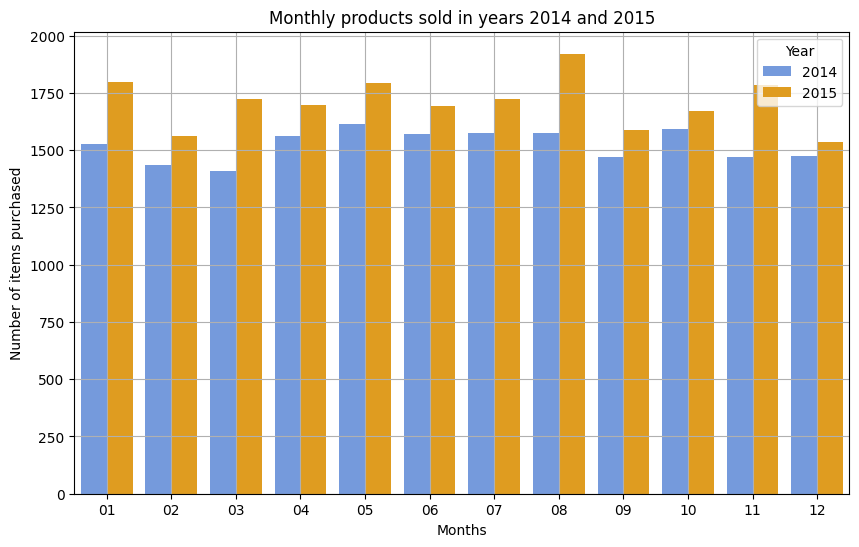

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combining both data frames
sales_combined = pd.concat([sales_2014, sales_2015])

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_combined, x='month', y='count', hue='year', palette={2014: "cornflowerblue", 2015: "orange"})
plt.xlabel('Months')
plt.ylabel('Number of items purchased')
plt.title('Monthly products sold in years 2014 and 2015')
plt.legend(title='Year')
plt.grid(True)
plt.show()

count    3898.000000
mean        9.944844
std         5.310796
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        36.000000
Name: count, dtype: float64


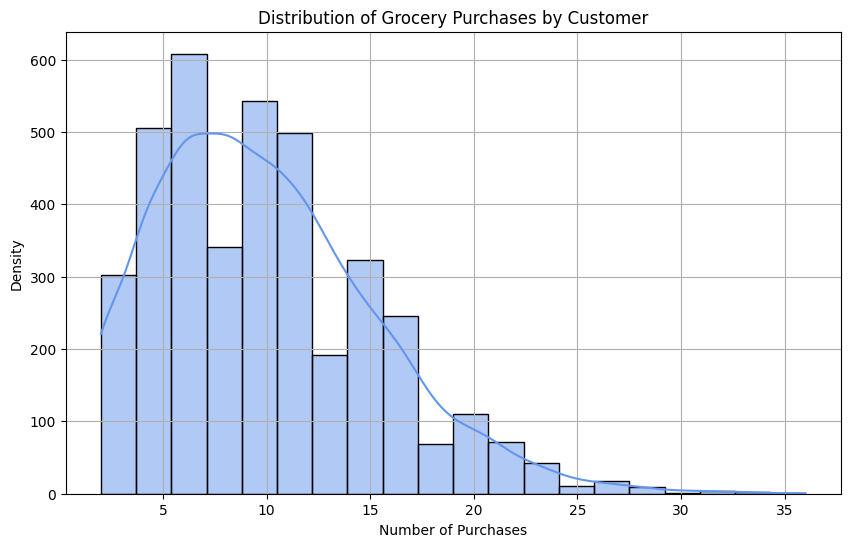

In [ ]:
groceries_agg = df.groupby('member_id').size().reset_index(name='count').sort_values(by='count')

# Descriptive statistics
print(groceries_agg['count'].describe())

# Plotting histogram with density plot
plt.figure(figsize=(10, 6))
sns.histplot(groceries_agg['count'], kde=True, bins=20, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Grocery Purchases by Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.grid(True)
plt.show()

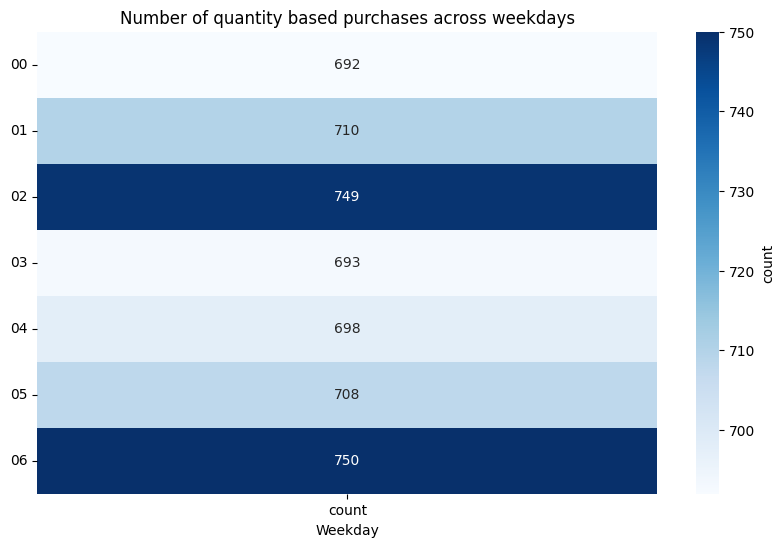

In [ ]:
df['qty_purchased'] = df.groupby('member_id')['member_id'].transform('count')
temp1 = df.head(5000)
temp1.loc[:, 'weekday'] = temp1['weekday'].astype('category')
weekday_bin = temp1['weekday'].value_counts().reset_index()
weekday_bin.columns = ['weekday', 'count']
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap: Pivot the data for heatmap compatibility
heatmap_data = weekday_bin.pivot_table(index='weekday', values='count', aggfunc='sum')
heatmap_data.fillna(0, inplace=True)  # fill missing values with 0

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='Blues', cbar_kws={'label': 'count'})
plt.title('Number of quantity based purchases across weekdays')
plt.xlabel('Weekday')
plt.ylabel('')
plt.yticks(rotation=0)  # keep the y-ticks horizontal
plt.show()

In [ ]:
# Count unique members per date
unique_members_per_month1 = df1.groupby('month')['member_id'].nunique()
unique_members_per_month2 = df2.groupby('month')['member_id'].nunique()

# unique_members_per_month1['year']= 2014
# unique_members_per_month2['year']= 2015


In [ ]:
unm_combined = pd.concat([unique_members_per_month1, unique_members_per_month2])
unm_combined

month
01    612
02    589
03    573
04    632
05    660
06    613
07    628
08    637
09    602
10    639
11    608
12    602
01    580
02    519
03    531
04    526
05    579
06    523
07    539
08    593
09    514
10    539
11    562
12    505
Name: member_id, dtype: int64

<ipython-input-16-275ed3257388>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_members_per_month1, x='month', y='member_id', palette={"cornflowerblue"})


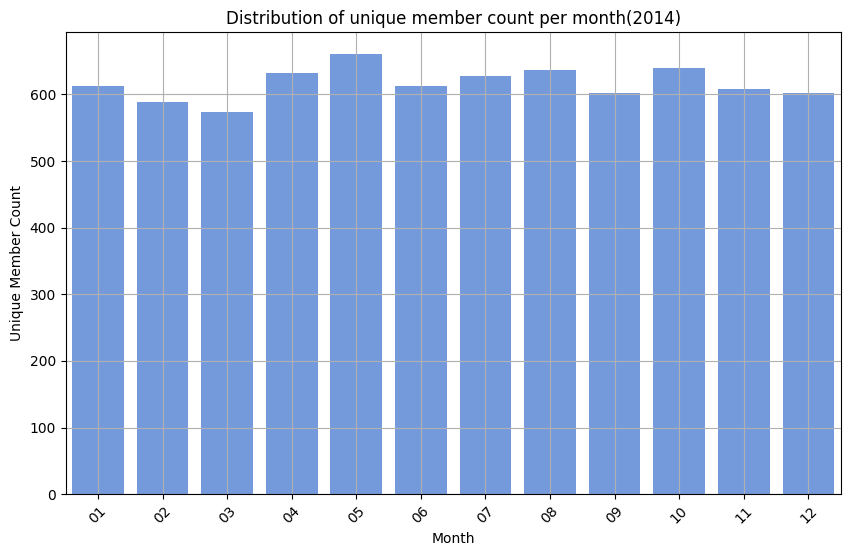

In [ ]:
unique_members_per_month1 = unique_members_per_month1.sort_index()
unique_members_per_month1 = unique_members_per_month1.reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_members_per_month1, x='month', y='member_id', palette={"cornflowerblue"})
plt.xlabel('Month')
plt.ylabel('Unique Member Count')
plt.title('Distribution of unique member count per month(2014)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-17-0780ad217d06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_members_per_month2, x='month', y='member_id', palette={'orange'})


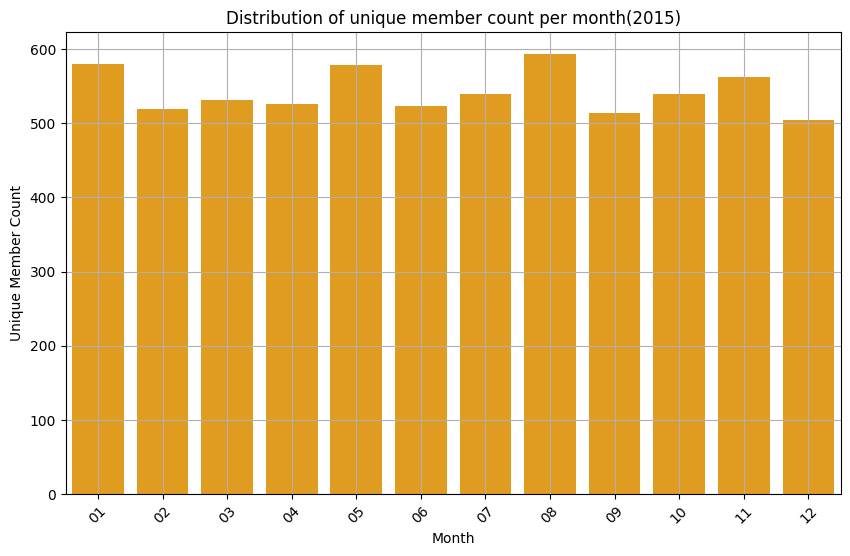

In [ ]:
unique_members_per_month2 = unique_members_per_month2.sort_index()
unique_members_per_month2 = unique_members_per_month2.reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_members_per_month2, x='month', y='member_id', palette={'orange'})
plt.xlabel('Month')
plt.ylabel('Unique Member Count')
plt.title('Distribution of unique member count per month(2015)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

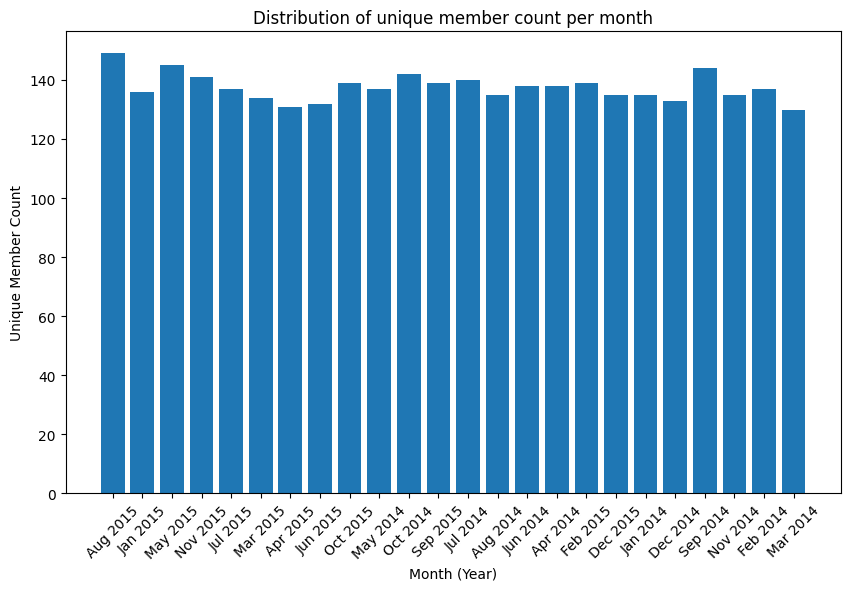

In [ ]:
# Count unique members per date
unique_members_per_month = df.groupby('month_of_year')['item_name'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(month_year_counts.index, unique_members_per_month)
plt.xlabel("Month (Year)")
plt.ylabel("Unique Member Count")
plt.title("Distribution of unique member count per month")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

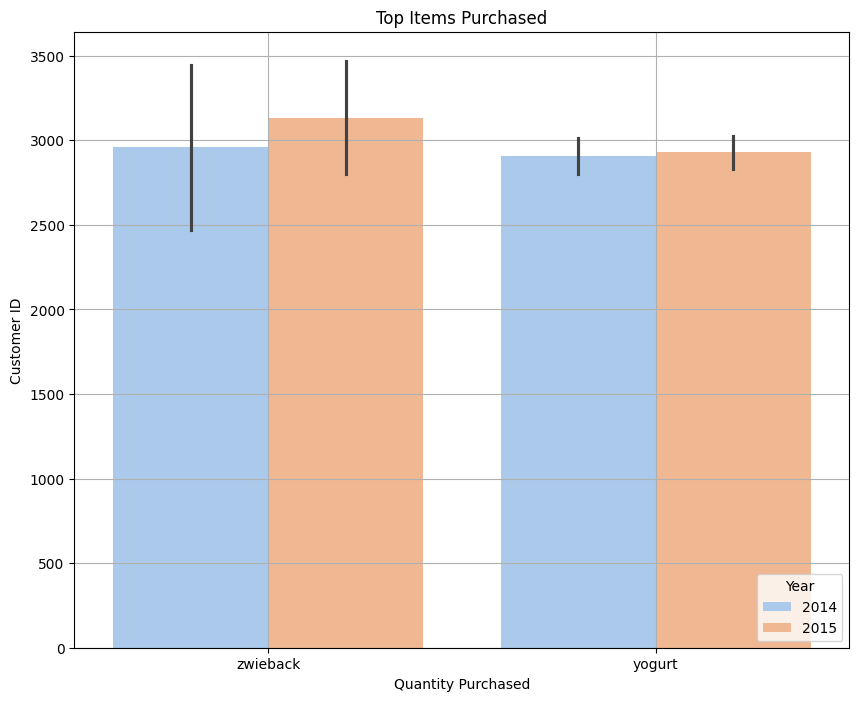

In [ ]:
top_customers = df[['member_id', 'item_name', 'year']].sort_values(by='item_name', ascending=False).head(1000)

# Converting the datatype of Member_number and year
top_customers['Member_number'] = top_customers['member_id'].astype('category')
top_customers['year'] = top_customers['year'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.barplot(data=top_customers, x='item_name', y='member_id', hue='year', palette='pastel')
plt.title('Top Items Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Customer ID')
plt.legend(title='Year', loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Count number of visit from members
number_of_visit = df.groupby('member_id')['date'].nunique()
# Print the result
print(number_of_visit)

member_id
1000    5
1001    5
1002    4
1003    4
1004    8
       ..
4996    3
4997    2
4998    1
4999    6
5000    3
Name: date, Length: 3898, dtype: int64


Database connection

In [ ]:
# connect to database
conn = sqlite3.connect("RFMdb")
cur = conn.cursor()

In [ ]:
# load CRM data into the RFMdb database
try:
  df.to_sql("data", conn)
except:
  pass

In [ ]:
# CHECK IF DATA INSERTED INTO data/RFMdb
df_Fact = pd.read_sql('SELECT * FROM data', conn)
df_Fact

,index,member_id,date,item_name,month_of_year,year,month,day
0,0,1808,2015-07-21 00:00:00,tropical fruit,Jul 2015,2015,07,21
1,1,2552,2015-01-05 00:00:00,whole milk,Jan 2015,2015,01,05
2,2,2300,2015-09-19 00:00:00,pip fruit,Sep 2015,2015,09,19
3,3,1187,2015-12-12 00:00:00,other vegetables,Dec 2015,2015,12,12
4,4,3037,2015-02-01 00:00:00,whole milk,Feb 2015,2015,02,01
...,...,...,...,...,...,...,...,...
38760,38760,4471,2014-10-08 00:00:00,sliced cheese,Oct 2014,2014,10,08
38761,38761,2022,2014-02-23 00:00:00,candy,Feb 2014,2014,02,23
38762,38762,1097,2014-04-16 00:00:00,cake bar,Apr 2014,2014,04,16
38763,38763,1510,2014-12-03 00:00:00,fruit/vegetable juice,Dec 2014,2014,12,03


In [ ]:
# clean data and group transactions by Customerid
try:
  pd.read_sql('DROP TABLE IF EXISTS cleandata', conn)
except:
  pass

cleandata = pd.read_sql('''
SELECT
  member_id, MAX(date) AS last_purchased_date,
  julianday(date()) - julianday(max(date)) AS days_since_last_purchase,
  COUNT(distinct date) AS frequency,
  COUNT(*) AS number_of_items
FROM data
WHERE member_id IS NOT NULL
GROUP BY member_id
''', conn)

# Write clean CRM data into the database
cleandata.to_sql("cleandata", conn)

3898

In [ ]:
cleandata.dtypes
# cleandata['last_purchased_date'] = pd.to_datetime(cleandata['last_purchased_date'])
# cleandata.dtypes

member_id                     int64
last_purchased_date          object
days_since_last_purchase    float64
frequency                     int64
number_of_items               int64
dtype: object

In [ ]:
# import numpy as np
# import datetime

# cleandata["last_purchased_date"] = cleandata["last_purchased_date"].dt.date
# # Create snapshot date
# snapshot_date = cleandata['last_purchased_date'].max() + datetime.timedelta(days=1)
# print(snapshot_date)
# # Aggregate data by each customer
# customers = cleandata.groupby(['member_id']).agg({
#    'last_purchased_date': lambda x: (snapshot_date - x.max()).days,
#    'frequency':'sum' ,
#    'number_of_items': 'sum'})

# # Rename columns
# customers.rename(columns = {'last_purchased_date': 'Recency',
#                             'frequency': 'Frequency',
#                             'number_of_items': 'MonetaryValue'}, inplace=True)

In [ ]:
cleandata

,member_id,last_purchased_date,days_since_last_purchase,frequency,number_of_items
0,1000,2015-11-25 00:00:00,3076.0,5,13
1,1001,2015-05-02 00:00:00,3283.0,5,12
2,1002,2015-08-30 00:00:00,3163.0,4,8
3,1003,2015-02-10 00:00:00,3364.0,4,8
4,1004,2015-12-02 00:00:00,3069.0,8,21
...,...,...,...,...,...
3893,4996,2015-11-24 00:00:00,3077.0,3,10
3894,4997,2015-12-27 00:00:00,3044.0,2,6
3895,4998,2015-10-14 00:00:00,3118.0,1,2
3896,4999,2015-12-26 00:00:00,3045.0,6,16


In [ ]:
# def min_max_scaling(cleandata, days_since_last_purchase):
#     min_value = cleandata['days_since_last_purchase'].min()
#     max_value = cleandata['days_since_last_purchase'].max()
#     cleandata[days_since_last_purchase] = (cleandata[days_since_last_purchase] - min_value) / (max_value - min_value)

# min_max_scaling(cleandata, 'days_since_last_purchase')

# # Print the DataFrame after min-max scaling
# print("DataFrame after Min-Max Scaling:")
# print(cleandata)
# print()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# sns.histplot(data=cleandata, x='Recency', kde=True)
# ax.set_title('Histogram and Recency')


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# sns.histplot(data=cleandata, x='Frequency', kde=True)
# ax.set_title('Histogram and Frequency')


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# sns.histplot(data=customers, x='MonetaryValue', kde=True)
# ax.set_title('Histogram and MonetaryValue')


In [ ]:
# # Plot RFM distributions
# plt.figure(figsize=(12,10))
# # Plot distribution of R
# plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
# # Plot distribution of F
# plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
# # Plot distribution of M
# plt.subplot(3, 1, 3); sns.distplot(customers['MonetaryValue'])
# # Show the plot
# plt.show()


In [ ]:
# from scipy import stats
# customers_fix = pd.DataFrame()
# customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
# customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
# customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
# customers_fix.tail()

In [ ]:
# # Plot RFM distributions
# plt.figure(figsize=(12,10))
# # Plot distribution of R
# plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
# # Plot distribution of F
# plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
# # Plot distribution of M
# plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])
# # Show the plot
# plt.show()

In [ ]:
def plot(data, args=['days_since_last_purchase','frequency','number_of_items']):
  pass


In [ ]:
scaler = MinMaxScaler()
normalized = cleandata[['days_since_last_purchase','frequency','number_of_items']]
normalized = scaler.fit_transform(normalized)
normalized = pd.DataFrame(normalized)

In [ ]:
normalized

,0,1,2
0,0.048143,0.4,0.323529
1,0.332875,0.4,0.294118
2,0.167813,0.3,0.176471
3,0.444292,0.3,0.176471
4,0.038514,0.7,0.558824
...,...,...,...
3893,0.049519,0.2,0.235294
3894,0.004127,0.1,0.117647
3895,0.105915,0.0,0.000000
3896,0.005502,0.5,0.411765


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=16)
kmeans.fit(normalized)
clusters = kmeans.labels_
# cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.10871179356377521


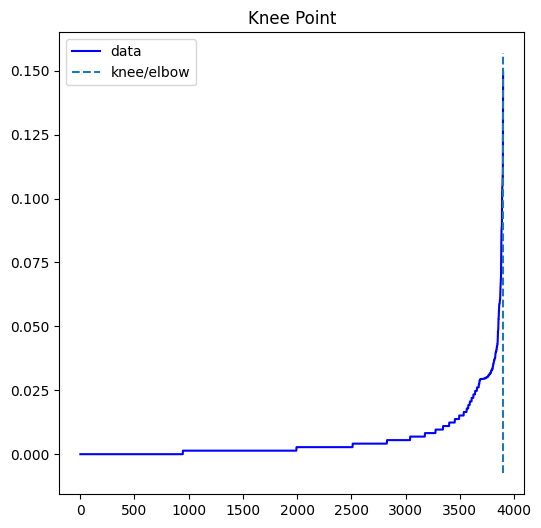

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(normalized)
distances, indices = neighbors_fit.kneighbors(normalized)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

kneedle.plot_knee()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=kneedle.knee_y, min_samples=6)
dbscan.fit(normalized)
clusters = dbscan.labels_

In [ ]:
normalized

,0,1,2
0,0.048143,0.4,0.323529
1,0.332875,0.4,0.294118
2,0.167813,0.3,0.176471
3,0.444292,0.3,0.176471
4,0.038514,0.7,0.558824
...,...,...,...
3893,0.049519,0.2,0.235294
3894,0.004127,0.1,0.117647
3895,0.105915,0.0,0.000000
3896,0.005502,0.5,0.411765


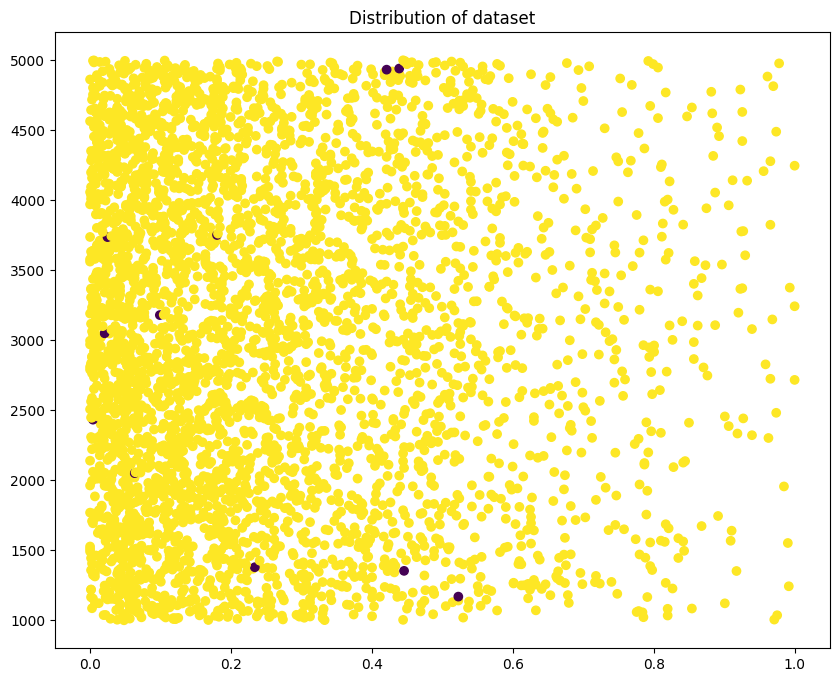

In [ ]:
fig = plt.figure(figsize=(10, 8))
data=normalized
ax = fig.add_subplot()
ax.scatter(data[0], cleandata['member_id'], c=clusters)
ax.set_title('Distribution of dataset')

plt.show()

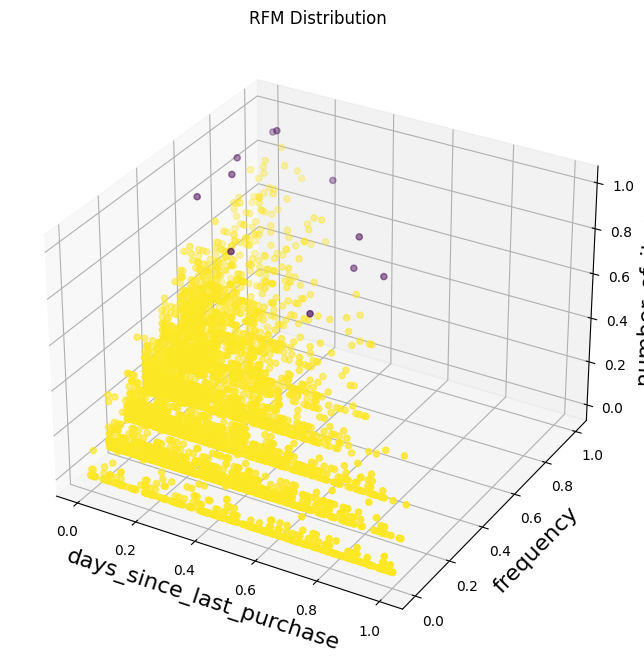

,0,1,2
0,0.048143,0.4,0.323529
1,0.332875,0.4,0.294118
2,0.167813,0.3,0.176471
3,0.444292,0.3,0.176471
4,0.038514,0.7,0.558824
...,...,...,...
3893,0.049519,0.2,0.235294
3894,0.004127,0.1,0.117647
3895,0.105915,0.0,0.000000
3896,0.005502,0.5,0.411765


In [ ]:
  args=['days_since_last_purchase','frequency','number_of_items']
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  # ax = fig.add_subplot(111)
  data = normalized
  # Scatterplot
  # plt.clf()
  ax.scatter(data[0], data[1], data[2], c=clusters)

  # Labeling the clusters
  # for cluster_label in np.unique(clusters):
  #     cluster_points = data[clusters == cluster_label]
  #     centroid = np.mean(cluster_points, axis=0)
  #     ax.text(centroid[0], centroid[1], centroid[2], 'Cluster {}'.format(cluster_label), fontsize=12)

  ax.set_xlabel(args[0], fontsize=16)
  ax.set_ylabel(args[1], fontsize=16)
  ax.set_zlabel(args[2], fontsize=16)
  ax.set_title('RFM Distribution')

  plt.show()
  data

In [ ]:
data[1].value_counts()

1
0.2    811
0.3    767
0.1    689
0.4    552
0.5    381
0.0    349
0.6    208
0.7     67
0.8     48
0.9     21
1.0      5
Name: count, dtype: int64

In [ ]:
# df_RFM = pd.read_sql('''SELECT member_id,
#              NTILE(4) OVER (ORDER BY Recency) AS rfm_recency,
#              NTILE(4) OVER (ORDER BY Frequency) AS rfm_frequency,
#              NTILE(4) OVER (ORDER BY MonetaryValue) AS rfm_monetary
#       FROM
#             cleandata''', conn)

In [ ]:
cleandata

,member_id,last_purchased_date,days_since_last_purchase,frequency,number_of_items
0,1000,2015-11-25 00:00:00,3076.0,5,13
1,1001,2015-05-02 00:00:00,3283.0,5,12
2,1002,2015-08-30 00:00:00,3163.0,4,8
3,1003,2015-02-10 00:00:00,3364.0,4,8
4,1004,2015-12-02 00:00:00,3069.0,8,21
...,...,...,...,...,...
3893,4996,2015-11-24 00:00:00,3077.0,3,10
3894,4997,2015-12-27 00:00:00,3044.0,2,6
3895,4998,2015-10-14 00:00:00,3118.0,1,2
3896,4999,2015-12-26 00:00:00,3045.0,6,16


In [ ]:
#clean the data and calculate rfm values
df_Fact = pd.read_sql(''' SELECT member_id, rfm_recency, rfm_frequency, rfm_monetary, rfm_recency*100 + rfm_frequency*10 + rfm_monetary AS rfm_combined
    FROM
     ( SELECT member_id,
             NTILE(4) OVER (ORDER BY days_since_last_purchase) AS rfm_recency,
             NTILE(4) OVER (ORDER BY frequency) AS rfm_frequency,
             NTILE(4) OVER (ORDER BY number_of_items) AS rfm_monetary
      FROM
            cleandata
            )
 ''', conn)

In [ ]:
df_Fact

,member_id,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined
0,1963,1,1,1,111
1,4565,1,1,1,111
2,4863,1,1,1,111
3,1769,1,1,1,111
4,3191,1,1,1,111
...,...,...,...,...,...
3893,1243,4,1,1,411
3894,3376,4,1,1,411
3895,2717,4,1,1,411
3896,3243,4,1,1,411


In [ ]:
df_Fact['rfm_combined'].value_counts()

rfm_combined
411    457
144    369
244    270
133    205
311    202
322    201
422    200
233    196
333    192
344    184
222    155
122    138
211    130
433    114
111     80
232     48
432     48
323     47
223     46
243     45
143     43
332     40
412     39
444     39
132     39
123     39
421     34
312     30
334     29
234     28
221     27
134     26
321     25
423     23
212     23
121     20
343     16
112     14
434      9
324      8
443      8
224      7
424      3
124      2
Name: count, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def rfm_level(df_Fact):
    if ((df_Fact['rfm_recency'] >= 4) and (df_Fact['rfm_frequency'] >= 4)
        and (df_Fact['rfm_monetary'] >= 4)):
        return 'Best Customers'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 3)
          and (df_Fact['rfm_monetary'] >= 3)):
        return 'Loyal'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Potential Loyalist'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 1)):
        return 'Promising'
    elif ((df_Fact['rfm_recency'] >= 2) and (df_Fact['rfm_frequency'] >= 2)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Customers Needing Attention'
    elif ((df_Fact['rfm_recency'] >= 1) and (df_Fact['rfm_frequency'] >= 2)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'At Risk'
    elif ((df_Fact['rfm_recency'] >= 1) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Hibernating'
    else:
        return 'Lost'

#Create a new variable rfm_level
df_Fact['rfm_level'] = df_Fact.apply(rfm_level, axis=1)
df_Fact


,member_id,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,rfm_level
0,1963,1,1,1,111,Lost
1,4565,1,1,1,111,Lost
2,4863,1,1,1,111,Lost
3,1769,1,1,1,111,Lost
4,3191,1,1,1,111,Lost
...,...,...,...,...,...,...
3893,1243,4,1,1,411,Promising
3894,3376,4,1,1,411,Promising
3895,2717,4,1,1,411,Promising
3896,3243,4,1,1,411,Promising


In [ ]:
df_Fact.head(30)

,member_id,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,rfm_level
0,1963,1,1,1,111,Lost
1,4565,1,1,1,111,Lost
2,4863,1,1,1,111,Lost
3,1769,1,1,1,111,Lost
4,3191,1,1,1,111,Lost
5,2970,1,1,2,112,Hibernating
6,2140,1,2,1,121,Lost
7,4058,1,2,2,122,At Risk
8,2790,1,2,2,122,At Risk
9,3738,1,3,3,133,At Risk


In [ ]:
# Calculate total customers in each segment
rfm_agg = df_Fact.groupby('rfm_level').agg({'member_id':'count'})
print(rfm_agg)


                             member_id
rfm_level                             
At Risk                            861
Best Customers                      39
Customers Needing Attention        795
Hibernating                         37
Lost                               257
Loyal                              552
Potential Loyalist                 639
Promising                          718


RFM visualization

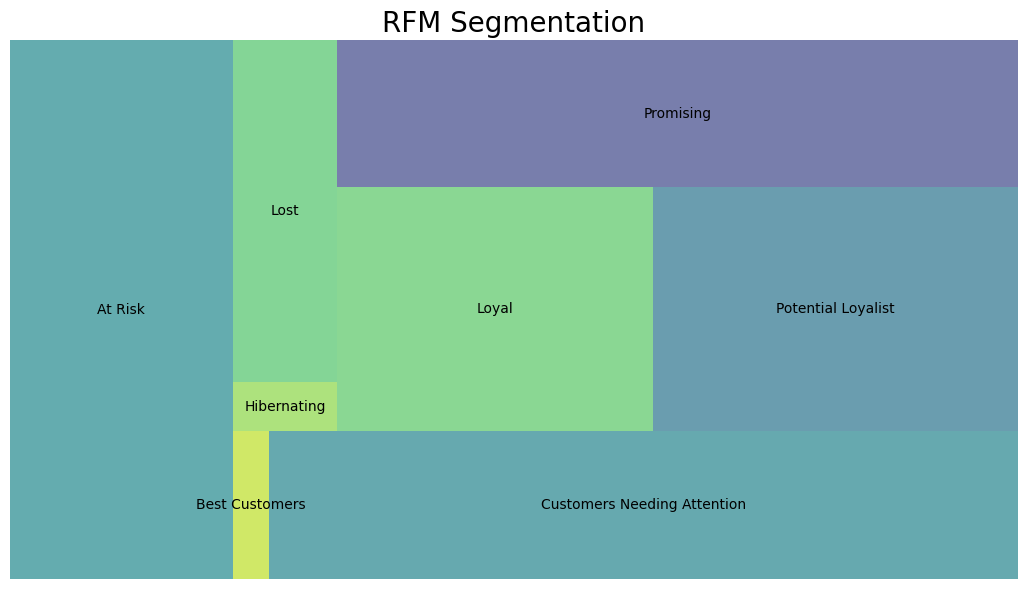

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 7)
squarify.plot(sizes=rfm_agg['member_id'],
              label=['At Risk',
                     'Best Customers',
                     'Customers Needing Attention',
                     'Hibernating',
                     'Lost',
                     'Loyal',
                     'Potential Loyalist',
                     'Promising'], alpha=0.7)
plt.title("RFM Segmentation",fontsize=20)
plt.axis('off')
plt.show()


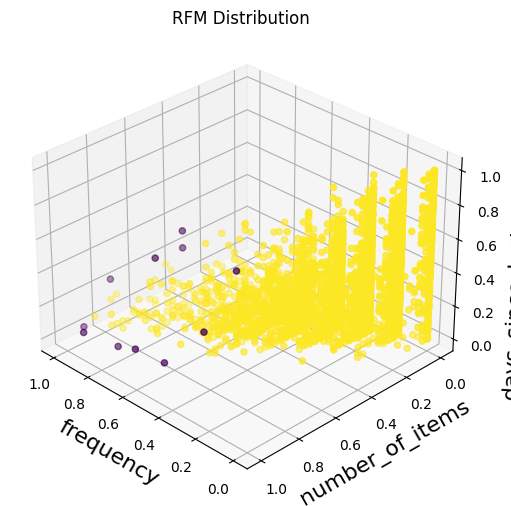

,0,1,2
0,0.048143,0.4,0.323529
1,0.332875,0.4,0.294118
2,0.167813,0.3,0.176471
3,0.444292,0.3,0.176471
4,0.038514,0.7,0.558824
...,...,...,...
3893,0.049519,0.2,0.235294
3894,0.004127,0.1,0.117647
3895,0.105915,0.0,0.000000
3896,0.005502,0.5,0.411765


In [ ]:
  args=['days_since_last_purchase','frequency','number_of_items']
  fig = plt.figure(figsize=(10, 6))
  ax = fig.add_subplot(111, projection='3d')
  # ax = fig.add_subplot(111)
  data = normalized
  # Scatterplot
  # plt.clf()
  ax.scatter(data[0], data[1], data[2], c=clusters)

  # Labeling the clusters
  # for cluster_label in np.unique(clusters):
  #     cluster_points = data[clusters == cluster_label]
  #     centroid = np.mean(cluster_points, axis=0)
  #     ax.text(centroid[0], centroid[1], centroid[2], 'Cluster {}'.format(cluster_label), fontsize=12)

  ax.set_xlabel(args[0], fontsize=16)
  ax.set_ylabel(args[1], fontsize=16)
  ax.set_zlabel(args[2], fontsize=16)
  ax.set_title('RFM Distribution')

  ax.view_init(vertical_axis='x', azim=135)

  plt.show()
  data

DBSCAN IMPLEMENTATION

In [ ]:
cleandata

,member_id,last_purchased_date,days_since_last_purchase,frequency,number_of_items
0,1000,2015-11-25 00:00:00,3076.0,5,13
1,1001,2015-05-02 00:00:00,3283.0,5,12
2,1002,2015-08-30 00:00:00,3163.0,4,8
3,1003,2015-02-10 00:00:00,3364.0,4,8
4,1004,2015-12-02 00:00:00,3069.0,8,21
...,...,...,...,...,...
3893,4996,2015-11-24 00:00:00,3077.0,3,10
3894,4997,2015-12-27 00:00:00,3044.0,2,6
3895,4998,2015-10-14 00:00:00,3118.0,1,2
3896,4999,2015-12-26 00:00:00,3045.0,6,16


In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
X = scaled
X

NameError: name 'scaled' is not defined

In [ ]:
from sklearn.cluster import DBSCAN
# Get the cluster labels
dbscan.labels_

In [ ]:
# Update DBSCAN parameters and perform clustering again
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan.fit(X)
dbscan.labels_

In [ ]:
# Calculate silhouette score
silhouette_score(X, dbscan.labels_)

In [ ]:
# Update DBSCAN parameters and perform clustering again
dbscan = DBSCAN(eps=7.68, min_samples=6)
dbscan.fit(X)

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
clusters = normalized['label']

# Scatterplot
ax.scatter(df_Fact[:, 0], df_Fact[:, 1], df_Fact[:, 2], c=clusters, cmap='viridis', s=50)

# Labeling the clusters
for cluster_label in np.unique(clusters):
    cluster_points = df_Fact[clusters == cluster_label]
    centroid = np.mean(cluster_points, axis=0)
    ax.text(centroid[0], centroid[1], centroid[2], 'Cluster {}'.format(cluster_label), fontsize=12)

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Data with DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_score(X, dbscan.labels_)

In [ ]:
# Add the cluster labels to the RFM dataframe
df_Fact['dbscan_labels'] = dbscan.labels_
df_Fact

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.56, min_samples=6).fit(X)
labels = db.labels_
# X['Labels'] = labels
labels.value_counts()

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(11, 6))
# fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X["days_since_last_purchase"], X["frequency"], X['number_of_items'])
# palette=sns.color_palette('hls', np.unique(db.labels_).shape[0])
plt.title('DBSCAN with epsilon 10.63, min samples 4')
plt.show()


In [ ]:
#Check the sixe of each cluster
DBSCAN_clust_sizes = X.groupby('Labels').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes
